In [1]:
import os
#import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import sys; sys.path.append("/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)


Welcome to JupyROOT 6.13/02


<module 'postprocessing_utils' from '/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/python/postprocessing_utils.pyc'>

In [2]:
ntuples = '2017/flattrees_st_cuts'
#ntuples = '2017'
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_st_cuts.root" in s]
diphotonJets = [s for s in files if "output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_st_cuts.root" in s]
##diphotonJets = [s for s in files if "output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_st_cuts_reweight2.root" in s]
gJets_lowPt = [s for s in files if "output_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts.root" in s]
gJets_highPt = [s for s in files if "output_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts.root" in s]
#
#signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_st_cuts_ptMjj.root" in s]
#diphotonJets = [s for s in files if "output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_st_cuts_ptMjj.root" in s]
##diphotonJets = [s for s in files if "output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_st_cuts_reweight_Mjj.root" in s]
#gJets_lowPt = [s for s in files if "output_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts_ptMjj.root" in s]
#gJets_highPt = [s for s in files if "output_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts_ptMjj.root" in s]
#
#
#signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_st_cuts_MXcut.root" in s]
#diphotonJets = [s for s in files if "output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_st_cuts_MXcut.root" in s]
#gJets_lowPt = [s for s in files if "output_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts_MXcut.root" in s]
#gJets_highPt = [s for s in files if "output_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts_MXcut.root" in s]
#
#signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_st_cuts_ptMjj_MXcut.root" in s]
#diphotonJets = [s for s in files if "output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_st_cuts_ptMjj_MXcut.root" in s]
#gJets_lowPt = [s for s in files if "output_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts_ptMjj_MXcut.root" in s]
#gJets_highPt = [s for s in files if "output_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts_ptMjj_MXcut.root" in s]
#

utils.IO.add_signal(ntuples,signal,1)
#utils.IO.add_background(ntuples,bkgr,-1)
utils.IO.add_background(ntuples,diphotonJets,-1)
utils.IO.add_background(ntuples,gJets_lowPt,-2)
utils.IO.add_background(ntuples,gJets_highPt,-2)

for i in range(len(utils.IO.backgroundName)):        
    print "using background file n."+str(i)+": "+utils.IO.backgroundName[i]
for i in range(len(utils.IO.signalName)):    
    print "using signal file n."+str(i)+": "+utils.IO.signalName[i]

env: data=/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2017/flattrees_st_cuts
using background file n.0: /home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2017/flattrees_st_cuts/output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_st_cuts.root
using background file n.1: /home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2017/flattrees_st_cuts/output_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts.root
using background file n.2: /home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2017/flattrees_st_cuts/output_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8_st_cuts.root
using signal file n.0: /home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2017/flattrees_st_cuts/output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_st_cuts.root


In [3]:
#use noexpand for root expressions, it needs this file https://github.com/ibab/root_pandas/blob/master/root_pandas/readwrite.py
#standart of input values 
branch_names = 'absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,PhoJetMinDr,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingJet_DeepCSV,subleadingJet_DeepCSV,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,leadingJet_bRegNNResolution,subleadingJet_bRegNNResolution,noexpand:sigmaMJets/Mjj'.split(",")
#st values with adding pt_gg/m_gg
#branch_names = 'absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,PhoJetMinDr,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingJet_DeepCSV,subleadingJet_DeepCSV,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,leadingJet_bRegNNResolution,subleadingJet_bRegNNResolution,noexpand:sigmaMJets/Mjj,noexpand:leadingPhoton_pt/CMS_hgg_mass,noexpand:subleadingPhoton_pt/CMS_hgg_mass'.split(",")
#st values with adding pt_gg/m_gg, pt_jj/M_jj
#branch_names = 'absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,PhoJetMinDr,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingJet_DeepCSV,subleadingJet_DeepCSV,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,leadingJet_bRegNNResolution,subleadingJet_bRegNNResolution,noexpand:sigmaMJets/Mjj,noexpand:leadingPhoton_pt/CMS_hgg_mass,noexpand:subleadingPhoton_pt/CMS_hgg_mass,noexpand:leadingJet_pt/Mjj,noexpand:subleadingJet_pt/Mjj,PhoJetotherDr'.split(",")

branch_names = [c.strip() for c in branch_names]
print branch_names

import pandas as pd
import root_pandas as rpd
from root_numpy import root2array, list_trees

#utils.IO.get_cross_sections('jsons/datasets80X_Moriond.json')
#utils.IO.w_sig.append(utils.IO.get_weight('signal','nrSM',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','DiPhoJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',1))

#print list_trees('/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2016/output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root')
for i in range(len(utils.IO.backgroundName)):        
    print list_trees(utils.IO.backgroundName[i])
        
preprocessing.set_signals_and_backgrounds("bbggSelectionTree",branch_names)
X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig=preprocessing.set_variables(branch_names)

#np.savetxt('/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/weightssig.txt',weights_sig)
#np.savetxt('/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/weightsbkg.txt',weights_bkg)
#import matplotlib.pyplot as plt
#from xgboost import plot_tree
#from sklearn.metrics import accuracy_score
#plotting.plot_input_variables(X_sig,X_bkg,branch_names)
#plt.show()

#relative weighting between components of one class is kept, all classes normalized to the same
#weights_sig=preprocessing.weight_signal_with_resolution(weights_sig,y_sig)
weights_bkg,weights_sig=preprocessing.normalize_process_weights(weights_bkg,y_bkg,weights_sig,y_sig)

X_bkg,y_bkg,weights_bkg = preprocessing.randomize(X_bkg,y_bkg,weights_bkg)
X_sig,y_sig,weights_sig = preprocessing.randomize(X_sig,y_sig,weights_sig)

print X_bkg.shape
print y_bkg.shape
#bbggTrees have by default signal and CR events, let's be sure that we clean it
X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig=preprocessing.clean_signal_events(X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig)
print X_bkg.shape
print y_bkg.shape

y_total_train = preprocessing.get_total_training_sample(y_sig,y_bkg).ravel()
X_total_train = preprocessing.get_total_training_sample(X_sig,X_bkg)

y_total_test = preprocessing.get_total_test_sample(y_sig,y_bkg).ravel()
X_total_test = preprocessing.get_total_test_sample(X_sig,X_bkg)

w_total_train = preprocessing.get_total_training_sample(weights_sig,weights_bkg).ravel()
w_total_test = preprocessing.get_total_test_sample(weights_sig,weights_bkg).ravel()


['absCosThetaStar_CS', 'absCosTheta_bb', 'absCosTheta_gg', 'PhoJetMinDr', 'customLeadingPhotonIDMVA', 'customSubLeadingPhotonIDMVA', 'leadingJet_DeepCSV', 'subleadingJet_DeepCSV', 'leadingPhotonSigOverE', 'subleadingPhotonSigOverE', 'sigmaMOverM', 'diphotonCandidatePtOverdiHiggsM', 'dijetCandidatePtOverdiHiggsM', 'leadingJet_bRegNNResolution', 'subleadingJet_bRegNNResolution', 'noexpand:sigmaMJets/Mjj']
['bbggSelectionTree']
['bbggSelectionTree']
['bbggSelectionTree']
using tree:bbggSelectionTree
(1557959, 16)
(1557959, 1)
(1557959, 16)
(1557959, 1)


In [4]:
########final optimization with all fixed#######

from sklearn.externals import joblib
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#X_all = preprocessing.cut_region(utils.IO.signalName[0],"tagsDumper/trees/GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0",branch_names,features,cuts)

#clf = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
#       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
#       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=20,
#       objective='binary:logistic', reg_alpha=0, reg_lambda=0.1,
#       scale_pos_weight=1, seed=0, silent=True, subsample=1)
#
#basic
#params = {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1,
#       'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 10,
#       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 2000, 'nthread': 20,
#       'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 0.1,
#       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
#
#1 -
params = {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1,
       'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 8,
       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 1500, 'nthread': 20,
       'objective': 'binary:logistic', 'reg_alpha': 0.0, 'reg_lambda': 0.01,
       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
#params = {'base_score': 0.5, 'booster':'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1,
#       'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 5,
#       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 2000, 'n_jobs':1, 'nthread': 12,
#       'objective': 'binary:logistic', 'random_state':0, 'reg_alpha': 0, 'reg_lambda': 1,
#       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
#params = {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1,
#       'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3,
#       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 1000, 'nthread': 12,
#       'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 0.1,
#       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
#params = {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1,
#       'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3,
#       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 40, 'nthread': 20,
#       'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 0.1,
#       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
clf = xgb.XGBClassifier(**params)
eval_set = [(X_total_train, y_total_train), (X_total_test, y_total_test)]
#clf.fit(X_total_train, y_total_train, sample_weight=w_total_train, eval_set=eval_set, eval_metric=["error", "logloss", "auc"], verbose=True)
#For multiclass
clf.fit(X_total_train, y_total_train, sample_weight=w_total_train, eval_set=eval_set, eval_metric=["merror","mlogloss"], verbose=True)
#clf.fit(X_total_train,y_total_train, sample_weight=w_total_train)
mse = mean_squared_error(y_total_test, clf.predict(X_total_test))
print("MSE: %.4f" % mse)
#clf.evals_result()
print clf.score(X_total_train,y_total_train)
#print clf.best_params_
joblib.dump(clf, os.path.expanduser('/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/output_files/simlple_Test_binary_st.pkl'), compress=9)
#joblib.dump(clf, os.path.expanduser('~/HHbbgg_ETH_devel/Training/output_files/simlple_Test_binary.pkl'), compress=9)

[0]	validation_0-merror:0.286765	validation_0-mlogloss:1.0944	validation_1-merror:0.287589	validation_1-mlogloss:1.09441
[1]	validation_0-merror:0.286592	validation_0-mlogloss:1.09024	validation_1-merror:0.287379	validation_1-mlogloss:1.09025
[2]	validation_0-merror:0.286087	validation_0-mlogloss:1.08614	validation_1-merror:0.28692	validation_1-mlogloss:1.08616
[3]	validation_0-merror:0.287695	validation_0-mlogloss:1.0821	validation_1-merror:0.288629	validation_1-mlogloss:1.08212
[4]	validation_0-merror:0.286146	validation_0-mlogloss:1.07811	validation_1-merror:0.287268	validation_1-mlogloss:1.07814
[5]	validation_0-merror:0.288034	validation_0-mlogloss:1.07418	validation_1-merror:0.28933	validation_1-mlogloss:1.07421
[6]	validation_0-merror:0.289759	validation_0-mlogloss:1.0703	validation_1-merror:0.2911	validation_1-mlogloss:1.07034
[7]	validation_0-merror:0.290063	validation_0-mlogloss:1.06647	validation_1-merror:0.291602	validation_1-mlogloss:1.06651
[8]	validation_0-merror:0.28623

[67]	validation_0-merror:0.231345	validation_0-mlogloss:0.901671	validation_1-merror:0.23244	validation_1-mlogloss:0.902025
[68]	validation_0-merror:0.23119	validation_0-mlogloss:0.899716	validation_1-merror:0.232322	validation_1-mlogloss:0.900075
[69]	validation_0-merror:0.231491	validation_0-mlogloss:0.897765	validation_1-merror:0.232722	validation_1-mlogloss:0.898127
[70]	validation_0-merror:0.231613	validation_0-mlogloss:0.895859	validation_1-merror:0.232793	validation_1-mlogloss:0.896224
[71]	validation_0-merror:0.231555	validation_0-mlogloss:0.893946	validation_1-merror:0.232717	validation_1-mlogloss:0.894317
[72]	validation_0-merror:0.231513	validation_0-mlogloss:0.892043	validation_1-merror:0.232685	validation_1-mlogloss:0.892416
[73]	validation_0-merror:0.231795	validation_0-mlogloss:0.890174	validation_1-merror:0.232914	validation_1-mlogloss:0.890551
[74]	validation_0-merror:0.23142	validation_0-mlogloss:0.888296	validation_1-merror:0.232523	validation_1-mlogloss:0.888676
[75

[133]	validation_0-merror:0.233947	validation_0-mlogloss:0.805655	validation_1-merror:0.235025	validation_1-mlogloss:0.806257
[134]	validation_0-merror:0.233923	validation_0-mlogloss:0.804618	validation_1-merror:0.23496	validation_1-mlogloss:0.805221
[135]	validation_0-merror:0.233981	validation_0-mlogloss:0.803617	validation_1-merror:0.235014	validation_1-mlogloss:0.804225
[136]	validation_0-merror:0.234061	validation_0-mlogloss:0.802591	validation_1-merror:0.235071	validation_1-mlogloss:0.803203
[137]	validation_0-merror:0.234132	validation_0-mlogloss:0.801593	validation_1-merror:0.235144	validation_1-mlogloss:0.802209
[138]	validation_0-merror:0.234256	validation_0-mlogloss:0.800628	validation_1-merror:0.23524	validation_1-mlogloss:0.801248
[139]	validation_0-merror:0.23438	validation_0-mlogloss:0.799627	validation_1-merror:0.235335	validation_1-mlogloss:0.800249
[140]	validation_0-merror:0.234506	validation_0-mlogloss:0.798639	validation_1-merror:0.235428	validation_1-mlogloss:0.79

[199]	validation_0-merror:0.237447	validation_0-mlogloss:0.752048	validation_1-merror:0.238748	validation_1-mlogloss:0.752874
[200]	validation_0-merror:0.237392	validation_0-mlogloss:0.751416	validation_1-merror:0.238718	validation_1-mlogloss:0.752247
[201]	validation_0-merror:0.237412	validation_0-mlogloss:0.750823	validation_1-merror:0.238748	validation_1-mlogloss:0.751657
[202]	validation_0-merror:0.237392	validation_0-mlogloss:0.750172	validation_1-merror:0.238725	validation_1-mlogloss:0.751009
[203]	validation_0-merror:0.237567	validation_0-mlogloss:0.749588	validation_1-merror:0.238876	validation_1-mlogloss:0.750428
[204]	validation_0-merror:0.237565	validation_0-mlogloss:0.74897	validation_1-merror:0.238841	validation_1-mlogloss:0.749813
[205]	validation_0-merror:0.237672	validation_0-mlogloss:0.748388	validation_1-merror:0.238933	validation_1-mlogloss:0.749235
[206]	validation_0-merror:0.237633	validation_0-mlogloss:0.747751	validation_1-merror:0.238866	validation_1-mlogloss:0.

[265]	validation_0-merror:0.241362	validation_0-mlogloss:0.719628	validation_1-merror:0.242761	validation_1-mlogloss:0.720665
[266]	validation_0-merror:0.241433	validation_0-mlogloss:0.719217	validation_1-merror:0.242836	validation_1-mlogloss:0.720257
[267]	validation_0-merror:0.241502	validation_0-mlogloss:0.718861	validation_1-merror:0.242941	validation_1-mlogloss:0.719904
[268]	validation_0-merror:0.241649	validation_0-mlogloss:0.718507	validation_1-merror:0.243085	validation_1-mlogloss:0.719552
[269]	validation_0-merror:0.241542	validation_0-mlogloss:0.718098	validation_1-merror:0.242995	validation_1-mlogloss:0.719146
[270]	validation_0-merror:0.241606	validation_0-mlogloss:0.717716	validation_1-merror:0.243021	validation_1-mlogloss:0.718768
[271]	validation_0-merror:0.241589	validation_0-mlogloss:0.71732	validation_1-merror:0.243034	validation_1-mlogloss:0.718376
[272]	validation_0-merror:0.241631	validation_0-mlogloss:0.716945	validation_1-merror:0.24307	validation_1-mlogloss:0.7

[331]	validation_0-merror:0.245096	validation_0-mlogloss:0.698527	validation_1-merror:0.246698	validation_1-mlogloss:0.699786
[332]	validation_0-merror:0.2452	validation_0-mlogloss:0.698269	validation_1-merror:0.2468	validation_1-mlogloss:0.699531
[333]	validation_0-merror:0.245357	validation_0-mlogloss:0.698036	validation_1-merror:0.246902	validation_1-mlogloss:0.699302
[334]	validation_0-merror:0.245421	validation_0-mlogloss:0.697802	validation_1-merror:0.246977	validation_1-mlogloss:0.69907
[335]	validation_0-merror:0.245578	validation_0-mlogloss:0.697595	validation_1-merror:0.247133	validation_1-mlogloss:0.698865
[336]	validation_0-merror:0.245685	validation_0-mlogloss:0.697347	validation_1-merror:0.247271	validation_1-mlogloss:0.698622
[337]	validation_0-merror:0.245844	validation_0-mlogloss:0.697101	validation_1-merror:0.247418	validation_1-mlogloss:0.698378
[338]	validation_0-merror:0.245838	validation_0-mlogloss:0.696862	validation_1-merror:0.247449	validation_1-mlogloss:0.6981

[397]	validation_0-merror:0.25182	validation_0-mlogloss:0.685195	validation_1-merror:0.253174	validation_1-mlogloss:0.686693
[398]	validation_0-merror:0.251878	validation_0-mlogloss:0.685025	validation_1-merror:0.253247	validation_1-mlogloss:0.686528
[399]	validation_0-merror:0.252002	validation_0-mlogloss:0.684846	validation_1-merror:0.253378	validation_1-mlogloss:0.686352
[400]	validation_0-merror:0.252158	validation_0-mlogloss:0.6847	validation_1-merror:0.253525	validation_1-mlogloss:0.686209
[401]	validation_0-merror:0.252259	validation_0-mlogloss:0.684556	validation_1-merror:0.253603	validation_1-mlogloss:0.686069
[402]	validation_0-merror:0.252236	validation_0-mlogloss:0.684355	validation_1-merror:0.253601	validation_1-mlogloss:0.685872
[403]	validation_0-merror:0.252329	validation_0-mlogloss:0.684213	validation_1-merror:0.253735	validation_1-mlogloss:0.685735
[404]	validation_0-merror:0.252418	validation_0-mlogloss:0.684067	validation_1-merror:0.25384	validation_1-mlogloss:0.685

[463]	validation_0-merror:0.256904	validation_0-mlogloss:0.67538	validation_1-merror:0.258594	validation_1-mlogloss:0.677125
[464]	validation_0-merror:0.256972	validation_0-mlogloss:0.675259	validation_1-merror:0.258683	validation_1-mlogloss:0.677008
[465]	validation_0-merror:0.257045	validation_0-mlogloss:0.675144	validation_1-merror:0.258776	validation_1-mlogloss:0.676897
[466]	validation_0-merror:0.257103	validation_0-mlogloss:0.675016	validation_1-merror:0.25887	validation_1-mlogloss:0.676771
[467]	validation_0-merror:0.257177	validation_0-mlogloss:0.674872	validation_1-merror:0.258882	validation_1-mlogloss:0.676632
[468]	validation_0-merror:0.257185	validation_0-mlogloss:0.674737	validation_1-merror:0.25891	validation_1-mlogloss:0.6765
[469]	validation_0-merror:0.25728	validation_0-mlogloss:0.674613	validation_1-merror:0.258976	validation_1-mlogloss:0.676379
[470]	validation_0-merror:0.257332	validation_0-mlogloss:0.674491	validation_1-merror:0.259013	validation_1-mlogloss:0.67626

[529]	validation_0-merror:0.260153	validation_0-mlogloss:0.667558	validation_1-merror:0.262024	validation_1-mlogloss:0.66953
[530]	validation_0-merror:0.260191	validation_0-mlogloss:0.667459	validation_1-merror:0.26208	validation_1-mlogloss:0.669433
[531]	validation_0-merror:0.260214	validation_0-mlogloss:0.667348	validation_1-merror:0.262087	validation_1-mlogloss:0.669327
[532]	validation_0-merror:0.26028	validation_0-mlogloss:0.667246	validation_1-merror:0.262146	validation_1-mlogloss:0.669229
[533]	validation_0-merror:0.260306	validation_0-mlogloss:0.667149	validation_1-merror:0.262185	validation_1-mlogloss:0.669136
[534]	validation_0-merror:0.260301	validation_0-mlogloss:0.667034	validation_1-merror:0.262209	validation_1-mlogloss:0.669023
[535]	validation_0-merror:0.260311	validation_0-mlogloss:0.666901	validation_1-merror:0.262204	validation_1-mlogloss:0.668893
[536]	validation_0-merror:0.260387	validation_0-mlogloss:0.666808	validation_1-merror:0.262283	validation_1-mlogloss:0.66

[595]	validation_0-merror:0.262077	validation_0-mlogloss:0.660965	validation_1-merror:0.263895	validation_1-mlogloss:0.663158
[596]	validation_0-merror:0.262104	validation_0-mlogloss:0.660854	validation_1-merror:0.263927	validation_1-mlogloss:0.663051
[597]	validation_0-merror:0.262108	validation_0-mlogloss:0.660749	validation_1-merror:0.263925	validation_1-mlogloss:0.662949
[598]	validation_0-merror:0.262098	validation_0-mlogloss:0.660662	validation_1-merror:0.263931	validation_1-mlogloss:0.662866
[599]	validation_0-merror:0.262062	validation_0-mlogloss:0.660547	validation_1-merror:0.263926	validation_1-mlogloss:0.662754
[600]	validation_0-merror:0.262105	validation_0-mlogloss:0.660471	validation_1-merror:0.263919	validation_1-mlogloss:0.66268
[601]	validation_0-merror:0.262069	validation_0-mlogloss:0.660367	validation_1-merror:0.263913	validation_1-mlogloss:0.662579
[602]	validation_0-merror:0.26218	validation_0-mlogloss:0.660305	validation_1-merror:0.263992	validation_1-mlogloss:0.6

[661]	validation_0-merror:0.263525	validation_0-mlogloss:0.655482	validation_1-merror:0.265443	validation_1-mlogloss:0.657894
[662]	validation_0-merror:0.263526	validation_0-mlogloss:0.655422	validation_1-merror:0.265507	validation_1-mlogloss:0.657838
[663]	validation_0-merror:0.263536	validation_0-mlogloss:0.655325	validation_1-merror:0.265525	validation_1-mlogloss:0.657746
[664]	validation_0-merror:0.2635	validation_0-mlogloss:0.655217	validation_1-merror:0.265484	validation_1-mlogloss:0.657641
[665]	validation_0-merror:0.263544	validation_0-mlogloss:0.655157	validation_1-merror:0.265553	validation_1-mlogloss:0.657585
[666]	validation_0-merror:0.263579	validation_0-mlogloss:0.655077	validation_1-merror:0.265574	validation_1-mlogloss:0.65751
[667]	validation_0-merror:0.263588	validation_0-mlogloss:0.655009	validation_1-merror:0.265608	validation_1-mlogloss:0.657444
[668]	validation_0-merror:0.263576	validation_0-mlogloss:0.654915	validation_1-merror:0.265599	validation_1-mlogloss:0.65

[727]	validation_0-merror:0.264049	validation_0-mlogloss:0.650905	validation_1-merror:0.266132	validation_1-mlogloss:0.653546
[728]	validation_0-merror:0.264116	validation_0-mlogloss:0.650858	validation_1-merror:0.266167	validation_1-mlogloss:0.653504
[729]	validation_0-merror:0.2641	validation_0-mlogloss:0.6508	validation_1-merror:0.266167	validation_1-mlogloss:0.653448
[730]	validation_0-merror:0.264128	validation_0-mlogloss:0.650752	validation_1-merror:0.266196	validation_1-mlogloss:0.653404
[731]	validation_0-merror:0.264128	validation_0-mlogloss:0.65068	validation_1-merror:0.266187	validation_1-mlogloss:0.653335
[732]	validation_0-merror:0.264141	validation_0-mlogloss:0.650618	validation_1-merror:0.266203	validation_1-mlogloss:0.653276
[733]	validation_0-merror:0.264215	validation_0-mlogloss:0.65058	validation_1-merror:0.266212	validation_1-mlogloss:0.653241
[734]	validation_0-merror:0.264196	validation_0-mlogloss:0.650504	validation_1-merror:0.266213	validation_1-mlogloss:0.65316

[793]	validation_0-merror:0.264831	validation_0-mlogloss:0.646969	validation_1-merror:0.266786	validation_1-mlogloss:0.649848
[794]	validation_0-merror:0.264835	validation_0-mlogloss:0.646918	validation_1-merror:0.266801	validation_1-mlogloss:0.649801
[795]	validation_0-merror:0.264885	validation_0-mlogloss:0.646887	validation_1-merror:0.266846	validation_1-mlogloss:0.649773
[796]	validation_0-merror:0.264905	validation_0-mlogloss:0.646841	validation_1-merror:0.266906	validation_1-mlogloss:0.64973
[797]	validation_0-merror:0.26491	validation_0-mlogloss:0.646784	validation_1-merror:0.266875	validation_1-mlogloss:0.649677
[798]	validation_0-merror:0.264905	validation_0-mlogloss:0.646726	validation_1-merror:0.266879	validation_1-mlogloss:0.649622
[799]	validation_0-merror:0.264938	validation_0-mlogloss:0.646665	validation_1-merror:0.266894	validation_1-mlogloss:0.649565
[800]	validation_0-merror:0.264927	validation_0-mlogloss:0.646592	validation_1-merror:0.266862	validation_1-mlogloss:0.6

[859]	validation_0-merror:0.26518	validation_0-mlogloss:0.643553	validation_1-merror:0.26728	validation_1-mlogloss:0.646666
[860]	validation_0-merror:0.265171	validation_0-mlogloss:0.643514	validation_1-merror:0.267276	validation_1-mlogloss:0.646631
[861]	validation_0-merror:0.265134	validation_0-mlogloss:0.643451	validation_1-merror:0.267261	validation_1-mlogloss:0.646571
[862]	validation_0-merror:0.265102	validation_0-mlogloss:0.64339	validation_1-merror:0.267236	validation_1-mlogloss:0.646514
[863]	validation_0-merror:0.26508	validation_0-mlogloss:0.643341	validation_1-merror:0.267227	validation_1-mlogloss:0.646468
[864]	validation_0-merror:0.265058	validation_0-mlogloss:0.643281	validation_1-merror:0.267235	validation_1-mlogloss:0.646413
[865]	validation_0-merror:0.265102	validation_0-mlogloss:0.643252	validation_1-merror:0.267262	validation_1-mlogloss:0.646386
[866]	validation_0-merror:0.265091	validation_0-mlogloss:0.643198	validation_1-merror:0.267254	validation_1-mlogloss:0.646

[925]	validation_0-merror:0.265235	validation_0-mlogloss:0.640557	validation_1-merror:0.267449	validation_1-mlogloss:0.643878
[926]	validation_0-merror:0.265229	validation_0-mlogloss:0.640518	validation_1-merror:0.267482	validation_1-mlogloss:0.643842
[927]	validation_0-merror:0.265246	validation_0-mlogloss:0.640488	validation_1-merror:0.267479	validation_1-mlogloss:0.643817
[928]	validation_0-merror:0.265231	validation_0-mlogloss:0.640456	validation_1-merror:0.26748	validation_1-mlogloss:0.643787
[929]	validation_0-merror:0.265206	validation_0-mlogloss:0.640395	validation_1-merror:0.267457	validation_1-mlogloss:0.643729
[930]	validation_0-merror:0.265166	validation_0-mlogloss:0.640349	validation_1-merror:0.267415	validation_1-mlogloss:0.643686
[931]	validation_0-merror:0.265153	validation_0-mlogloss:0.640306	validation_1-merror:0.267419	validation_1-mlogloss:0.643646
[932]	validation_0-merror:0.265154	validation_0-mlogloss:0.640268	validation_1-merror:0.267413	validation_1-mlogloss:0.

[991]	validation_0-merror:0.265209	validation_0-mlogloss:0.637884	validation_1-merror:0.267525	validation_1-mlogloss:0.641417
[992]	validation_0-merror:0.265219	validation_0-mlogloss:0.637852	validation_1-merror:0.267538	validation_1-mlogloss:0.641389
[993]	validation_0-merror:0.265196	validation_0-mlogloss:0.637794	validation_1-merror:0.267529	validation_1-mlogloss:0.641335
[994]	validation_0-merror:0.265233	validation_0-mlogloss:0.637763	validation_1-merror:0.267533	validation_1-mlogloss:0.641307
[995]	validation_0-merror:0.265219	validation_0-mlogloss:0.637724	validation_1-merror:0.26753	validation_1-mlogloss:0.641271
[996]	validation_0-merror:0.265193	validation_0-mlogloss:0.637685	validation_1-merror:0.267529	validation_1-mlogloss:0.641236
[997]	validation_0-merror:0.265198	validation_0-mlogloss:0.637632	validation_1-merror:0.267519	validation_1-mlogloss:0.641186
[998]	validation_0-merror:0.265219	validation_0-mlogloss:0.637595	validation_1-merror:0.267502	validation_1-mlogloss:0.

[1056]	validation_0-merror:0.265085	validation_0-mlogloss:0.635427	validation_1-merror:0.267437	validation_1-mlogloss:0.639152
[1057]	validation_0-merror:0.265069	validation_0-mlogloss:0.635393	validation_1-merror:0.26743	validation_1-mlogloss:0.639123
[1058]	validation_0-merror:0.265084	validation_0-mlogloss:0.635354	validation_1-merror:0.267413	validation_1-mlogloss:0.639086
[1059]	validation_0-merror:0.26509	validation_0-mlogloss:0.635314	validation_1-merror:0.267427	validation_1-mlogloss:0.639048
[1060]	validation_0-merror:0.265088	validation_0-mlogloss:0.635282	validation_1-merror:0.267425	validation_1-mlogloss:0.639018
[1061]	validation_0-merror:0.265109	validation_0-mlogloss:0.635264	validation_1-merror:0.267461	validation_1-mlogloss:0.639003
[1062]	validation_0-merror:0.265065	validation_0-mlogloss:0.635215	validation_1-merror:0.267432	validation_1-mlogloss:0.638957
[1063]	validation_0-merror:0.265067	validation_0-mlogloss:0.635188	validation_1-merror:0.267433	validation_1-mlog

[1121]	validation_0-merror:0.264941	validation_0-mlogloss:0.633353	validation_1-merror:0.267429	validation_1-mlogloss:0.637259
[1122]	validation_0-merror:0.264942	validation_0-mlogloss:0.633335	validation_1-merror:0.267462	validation_1-mlogloss:0.637244
[1123]	validation_0-merror:0.264981	validation_0-mlogloss:0.633333	validation_1-merror:0.267513	validation_1-mlogloss:0.637244
[1124]	validation_0-merror:0.264984	validation_0-mlogloss:0.633306	validation_1-merror:0.267492	validation_1-mlogloss:0.637219
[1125]	validation_0-merror:0.265006	validation_0-mlogloss:0.633298	validation_1-merror:0.267524	validation_1-mlogloss:0.637213
[1126]	validation_0-merror:0.264957	validation_0-mlogloss:0.63325	validation_1-merror:0.267479	validation_1-mlogloss:0.637168
[1127]	validation_0-merror:0.264977	validation_0-mlogloss:0.633215	validation_1-merror:0.267481	validation_1-mlogloss:0.637136
[1128]	validation_0-merror:0.264962	validation_0-mlogloss:0.633195	validation_1-merror:0.267492	validation_1-mlo

[1186]	validation_0-merror:0.264862	validation_0-mlogloss:0.63149	validation_1-merror:0.267588	validation_1-mlogloss:0.635584
[1187]	validation_0-merror:0.264856	validation_0-mlogloss:0.631462	validation_1-merror:0.267587	validation_1-mlogloss:0.635559
[1188]	validation_0-merror:0.264878	validation_0-mlogloss:0.631446	validation_1-merror:0.26761	validation_1-mlogloss:0.635545
[1189]	validation_0-merror:0.264897	validation_0-mlogloss:0.631416	validation_1-merror:0.26761	validation_1-mlogloss:0.635518
[1190]	validation_0-merror:0.264897	validation_0-mlogloss:0.631393	validation_1-merror:0.267592	validation_1-mlogloss:0.635497
[1191]	validation_0-merror:0.2649	validation_0-mlogloss:0.631373	validation_1-merror:0.267587	validation_1-mlogloss:0.635479
[1192]	validation_0-merror:0.264875	validation_0-mlogloss:0.631332	validation_1-merror:0.267573	validation_1-mlogloss:0.635441
[1193]	validation_0-merror:0.264916	validation_0-mlogloss:0.631309	validation_1-merror:0.267598	validation_1-mloglos

[1251]	validation_0-merror:0.26498	validation_0-mlogloss:0.629847	validation_1-merror:0.267816	validation_1-mlogloss:0.634117
[1252]	validation_0-merror:0.264954	validation_0-mlogloss:0.629818	validation_1-merror:0.267798	validation_1-mlogloss:0.63409
[1253]	validation_0-merror:0.264947	validation_0-mlogloss:0.629793	validation_1-merror:0.267782	validation_1-mlogloss:0.634068
[1254]	validation_0-merror:0.264974	validation_0-mlogloss:0.629772	validation_1-merror:0.267798	validation_1-mlogloss:0.63405
[1255]	validation_0-merror:0.264975	validation_0-mlogloss:0.629761	validation_1-merror:0.267823	validation_1-mlogloss:0.634041
[1256]	validation_0-merror:0.264991	validation_0-mlogloss:0.629734	validation_1-merror:0.267823	validation_1-mlogloss:0.634017
[1257]	validation_0-merror:0.265004	validation_0-mlogloss:0.629705	validation_1-merror:0.267819	validation_1-mlogloss:0.63399
[1258]	validation_0-merror:0.265025	validation_0-mlogloss:0.629699	validation_1-merror:0.267881	validation_1-mloglo

[1316]	validation_0-merror:0.265073	validation_0-mlogloss:0.628262	validation_1-merror:0.267987	validation_1-mlogloss:0.632692
[1317]	validation_0-merror:0.265042	validation_0-mlogloss:0.62822	validation_1-merror:0.267975	validation_1-mlogloss:0.632652
[1318]	validation_0-merror:0.265031	validation_0-mlogloss:0.6282	validation_1-merror:0.267961	validation_1-mlogloss:0.632634
[1319]	validation_0-merror:0.265025	validation_0-mlogloss:0.628189	validation_1-merror:0.267975	validation_1-mlogloss:0.632625
[1320]	validation_0-merror:0.265037	validation_0-mlogloss:0.628167	validation_1-merror:0.26797	validation_1-mlogloss:0.632606
[1321]	validation_0-merror:0.265071	validation_0-mlogloss:0.628156	validation_1-merror:0.267994	validation_1-mlogloss:0.632597
[1322]	validation_0-merror:0.265052	validation_0-mlogloss:0.628128	validation_1-merror:0.267997	validation_1-mlogloss:0.632571
[1323]	validation_0-merror:0.26505	validation_0-mlogloss:0.628114	validation_1-merror:0.267987	validation_1-mloglos

[1381]	validation_0-merror:0.265161	validation_0-mlogloss:0.626922	validation_1-merror:0.268104	validation_1-mlogloss:0.631515
[1382]	validation_0-merror:0.265179	validation_0-mlogloss:0.626911	validation_1-merror:0.268124	validation_1-mlogloss:0.631507
[1383]	validation_0-merror:0.265178	validation_0-mlogloss:0.626895	validation_1-merror:0.268117	validation_1-mlogloss:0.631494
[1384]	validation_0-merror:0.265202	validation_0-mlogloss:0.626881	validation_1-merror:0.268157	validation_1-mlogloss:0.631482
[1385]	validation_0-merror:0.265199	validation_0-mlogloss:0.626848	validation_1-merror:0.268137	validation_1-mlogloss:0.631453
[1386]	validation_0-merror:0.265179	validation_0-mlogloss:0.626821	validation_1-merror:0.268133	validation_1-mlogloss:0.631428
[1387]	validation_0-merror:0.265174	validation_0-mlogloss:0.626806	validation_1-merror:0.268125	validation_1-mlogloss:0.631416
[1388]	validation_0-merror:0.265171	validation_0-mlogloss:0.626791	validation_1-merror:0.268141	validation_1-ml

[1446]	validation_0-merror:0.264847	validation_0-mlogloss:0.62548	validation_1-merror:0.268037	validation_1-mlogloss:0.630236
[1447]	validation_0-merror:0.264841	validation_0-mlogloss:0.625461	validation_1-merror:0.268033	validation_1-mlogloss:0.630219
[1448]	validation_0-merror:0.264853	validation_0-mlogloss:0.625443	validation_1-merror:0.268061	validation_1-mlogloss:0.630205
[1449]	validation_0-merror:0.264824	validation_0-mlogloss:0.625419	validation_1-merror:0.268025	validation_1-mlogloss:0.630182
[1450]	validation_0-merror:0.264838	validation_0-mlogloss:0.625396	validation_1-merror:0.268016	validation_1-mlogloss:0.630162
[1451]	validation_0-merror:0.264834	validation_0-mlogloss:0.625363	validation_1-merror:0.268006	validation_1-mlogloss:0.630132
[1452]	validation_0-merror:0.26483	validation_0-mlogloss:0.625364	validation_1-merror:0.26803	validation_1-mlogloss:0.630135
[1453]	validation_0-merror:0.264857	validation_0-mlogloss:0.625341	validation_1-merror:0.268022	validation_1-mlogl

['/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/output_files/simlple_Test_binary_st.pkl']

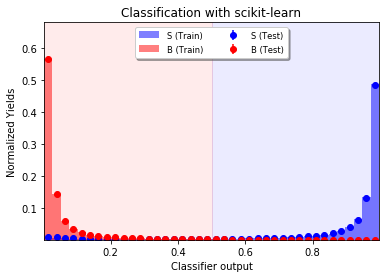

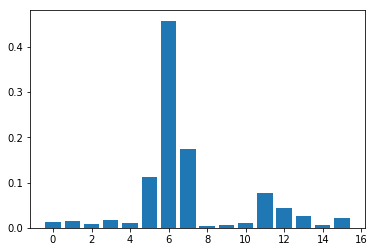

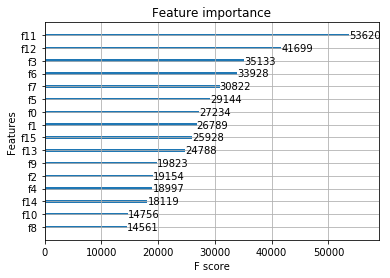

/home/ovtin/.local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


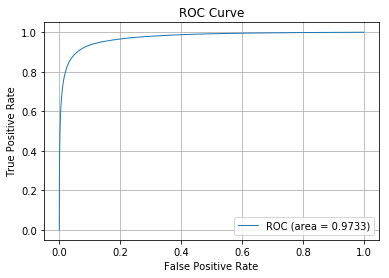

/home/ovtin/.local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


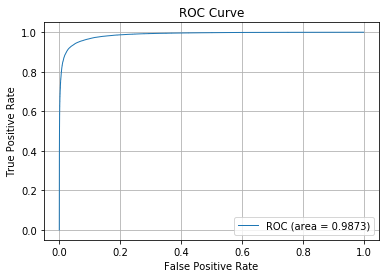

/home/ovtin/.local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


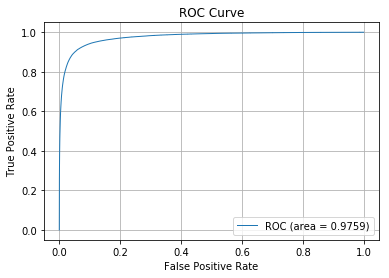

/home/ovtin/.local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


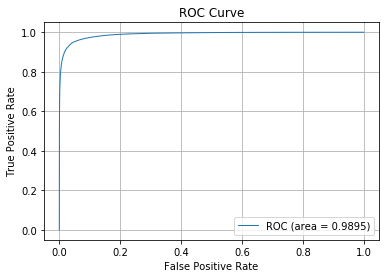

Accuracy: 73.22%


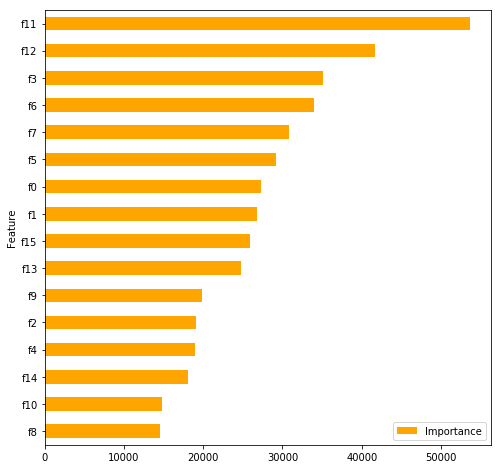

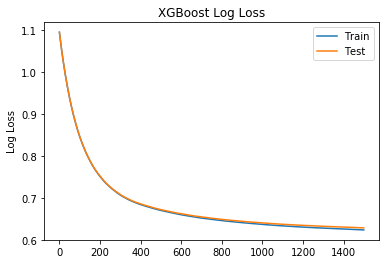

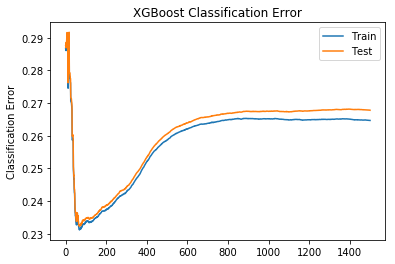

In [5]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from sklearn.metrics import accuracy_score

#plotting.plot_input_variables(X_sig,X_bkg,branch_names)
#plt.show()
plotting.plot_classifier_output(clf,X_total_train,X_total_test,y_total_train,y_total_test,outString="xbrg_test_st_values_notcut")
plt.show()

#fpr,tpr = plotting.plot_roc_curve(X_total_train,y_total_train,clf)
#plotting.print_roc_report(fpr,tpr)
#plt.savefig(utils.IO.plotFolder+"ROC_train.eps")
#plt.show()
#fpr,tpr = plotting.plot_roc_curve(X_total_test,y_total_test,clf)
#plotting.print_roc_report(fpr,tpr)
#plt.show()

plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.savefig(utils.IO.plotFolder+"importance1.eps")
plt.show()
#
xgb.plot_importance(clf)
plt.savefig(utils.IO.plotFolder+"importance2.eps")
plt.show()

fpr_dipho_2ndtest_2,tpr_dipho_2ndtest_2 = plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf,-1,outString="test_xgbr_diphotons_st_cuts",weights=w_total_test)
plotting.print_roc_report(fpr_dipho_2ndtest_2,tpr_dipho_2ndtest_2,outString="test_xgbr_diphotons_st_cuts")
plt.savefig(utils.IO.plotFolder+"test_xgbr_diphotons_st_cuts.eps")
plt.show()
fpr_gJets_2ndtest_2,tpr_gJets_2ndtest_2 = plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf,-2,outString="test_xgbr_gJets_st_cuts",weights=w_total_test)
plotting.print_roc_report(fpr_gJets_2ndtest_2,tpr_gJets_2ndtest_2,outString="test_xgbr_gJets_st_cuts")
plt.savefig(utils.IO.plotFolder+"test_xgbr_gJets_st_cuts.eps")
plt.show()

fpr_dipho_2ndtrain_2,tpr_dipho_2ndtrain_2 = plotting.plot_roc_curve_multiclass_singleBkg(X_total_train,y_total_train,clf,-1,outString="train_xgbr_diphotons_st_cuts",weights=w_total_train)
plotting.print_roc_report(fpr_dipho_2ndtrain_2,tpr_dipho_2ndtrain_2,outString="train_xgbr_diphotons_st_cuts")
plt.savefig(utils.IO.plotFolder+"train_xgbr_diphotons_st_cuts.eps")
plt.show()
fpr_gJets_2ndtrain_2,tpr_gJets_2ndtrain_2 = plotting.plot_roc_curve_multiclass_singleBkg(X_total_train,y_total_train,clf,-2,outString="train_xgbr_gJets_st_cuts",weights=w_total_train)
plotting.print_roc_report(fpr_gJets_2ndtrain_2,tpr_gJets_2ndtrain_2,outString="train_xgbr_gJets_st_cuts")
plt.savefig(utils.IO.plotFolder+"train_xgbr_gJets_st_cuts.eps")
plt.show()

# #############################################################################
#
# Plot feature importance
#importances = clf.get_fscore()
importances = clf.get_booster().get_score(importance_type='weight')
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')
#
# make predictions for test data
y_pred = clf.predict(X_total_test)
predictions = [round(value) for value in y_pred]    
# evaluate predictions
accuracy = accuracy_score(y_total_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

## retrieve performance metrics
results = clf.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
## plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.savefig(utils.IO.plotFolder+"XGBoostLogLoss.eps")
plt.show()
## plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.savefig(utils.IO.plotFolder+"XGBoostClassificationError.eps")
plt.show()
